# Class Analysis

## Hypothesis: I think the number of people that said the class was slow paced is equal to the number that took AP Computer Science Principles in high school.

In [31]:
%reload_ext autoreload
%autoreload 2

### My first step is to read in the class survey data table in csv format, and convert it to a column-oriented table.

In [32]:
from data_utils import read_csv_rows, columnar

rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(rows)

### My second step is to choose just the columns that contain data on AP Computer Science Principles and the pace of the class. The first 10 rows of each are displayed below.

In [33]:
from data_utils import head, select
ap_comp: dict[str, list[str]] = select(columns, ["AP_Principles", "pace"])
head(ap_comp, 10)

{'AP_Principles': ['', '', '', '', '', 'Yes', '', '', '', ''],
 'pace': ['5', '5', '5', '6', '5', '5', '6', '5', '4', '7']}

### My third step is to tally the total "Yes", "No", and unanswered responses from the AP Comp Sci Principles data.

In [34]:
from data_utils import count
totals = count(ap_comp["AP_Principles"])

print(f"Total 'Yes' responses: {totals['Yes']}")
print(f"Total 'No' responses: {totals['No']}")
print(f"Total left unanswered: {totals['']}")

Total 'Yes' responses: 46
Total 'No' responses: 124
Total left unanswered: 403


### My fourth step is to tally the total "fast" (5, 6, or 7), "slow" (1, 2, or 3), and "average" (4) paced responses from the pace data.

In [35]:
speed = count(ap_comp["pace"])

print(f"Total who said the class is fast-paced: {speed['7'] + speed['6'] + speed['5']}")
print(f"Total who said the class is slow-paced: {speed['1'] + speed['2'] + speed['3']}")
print(f"Total who said the class is average paced: {speed['4']}")

Total who said the class is fast-paced: 414
Total who said the class is slow-paced: 29
Total who said the class is average paced: 130


### Now, I will import the seaborn module to create a bar chart representing the data. This first graph shows the difference between students' perception of the class as fast, slow, or average paced.

In [36]:
import seaborn

<AxesSubplot:>

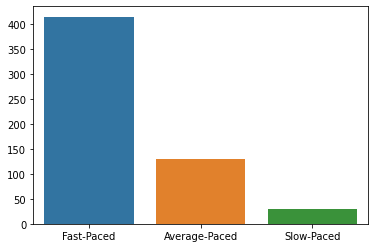

In [37]:
seaborn.barplot(x=["Fast-Paced", "Average-Paced", "Slow-Paced"], y=[414, 130, 29])

### This second graph shows a more detailed breakdown of students' perceived pace of the course (on a scale of 1-7), compared to the totals of students who did, did not, or declined to answer whether they had taken AP Computer Science Principles.

<BarContainer object of 7 artists>

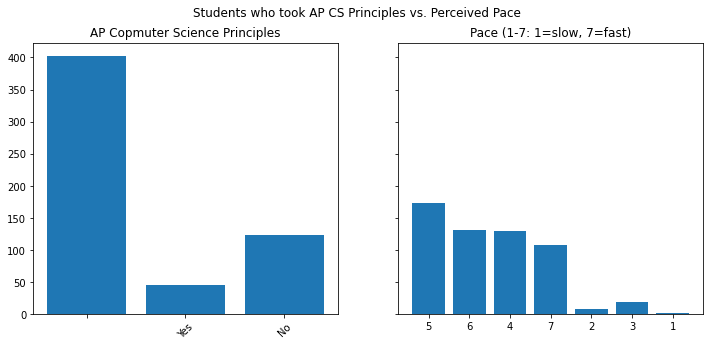

In [38]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Students who took AP CS Principles vs. Perceived Pace")


axes[0].set_title("AP Copmuter Science Principles")
axes[0].bar(totals.keys(), totals.values())
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("Pace (1-7: 1=slow, 7=fast)")
axes[1].bar(speed.keys(), speed.values())

## Conclusion

It turns out that I was wrong. In fact, 17 more people took AP Computer Science Principles than think the class is slow-paced. There could be some data points left out due to the fact that the AP question was optional, and over 400 did not answer it. I think it is safe to assume that most of these individuals did not take the course in high school. However, there very well could be some missing responses. I was surprised to find that 5 was the most common choice for pace. This shows that the class is probably paced a little above average for a similar course. 